(lecture14:uncorrelated-does-not-imply-independent)=
# Two uncorrelated random variables are not necessarily independent

We have seen that if two random variables $X$ and $Y$ are independent, then their covariance is zero,

$$
\mathbf{C}[X,Y] = 0,
$$

and therefore their correlation coefficient is also zero:

$$
\rho(X,Y) = 0.
$$

Does the reverse hold?
Namely, if you find that the correlation between two random variables is zero, does this imply that they are independent?
The answer to this question is a loud **NO**.
We will show that it does not hold through a counter example.

Take these two independent random variables:

$$
X \sim N(0, 1),
$$

and

$$
Z \sim N(0, 1).
$$

Then define this new random variable $Y$ by:

$$
Y = X^2 + 0.1 Z.
$$

Since there is a functional relationship between $X$ and $Y$, they are obviously not independent.
But let's generate some data from them and estimate the correlation:

In [1]:
MAKE_BOOK_FIGURES=True

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st

In [2]:
xdata = np.random.randn(10000)
zdata = np.random.randn(10000)
ydata = xdata ** 2 + 0.2 * zdata

It's instructive to look at the scatter plot:

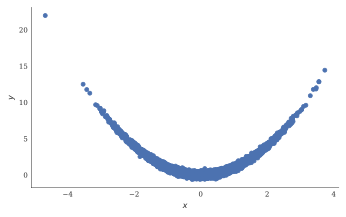

In [4]:
fig, ax = make_full_width_fig()
ax.scatter(xdata, ydata)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
save_for_book(fig, 'ch14.fig3')

Well, it's obvious that they are not independent.
Let's see what the correlation coefficient is:

In [5]:
rho = np.corrcoef(xdata, ydata)
print(f"rho(X, Y) = {rho[0, 1]:1.2f}")

rho(X, Y) = -0.01


Very close to zero.
So, $X$ and $Y$ are uncorrelated...
Rememeber this please!
Do the scatter plots and use your common sense.
Do not just rely on a number to make decisions.

After you see the scatter plot like this, you get suspicous.
You start thinking that there may be a correlation between the square of $X$ and $Y$.
Let's estimate the correlation of $X^2$ and $Y$ to see what it turns out to be:

In [6]:
rho = np.corrcoef(xdata ** 2, ydata)
print(f"rho(X^2, Y) = {rho[0, 1]:1.2f}")

rho(X^2, Y) = 0.99


Almost one! (It is actually exactly one).